# Audio Steganograpghy
----------

In [92]:
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
from scipy.fftpack import fft, ifft, fftfreq, fftshift
from scipy.signal import normalize
import numpy as np
import IPython.display as ipd

### Utility functions

In [26]:
def filterHighFreq(signalData): # Low pass filter
    dataAfterFilterFt = fft(signalData)
    for i in range(1*int(dataAfterFilterFt.size/8), 7*int(dataAfterFilterFt.size/8)):
        dataAfterFilterFt[i]=0
        
    return ifft(dataAfterFilterFt).real

3 Eqs:

total_samples = len(data) = len(fourier_transform) ----> (1)

duration = total_samples * sample_spacing ----------> (2)

rate = 1/sample_spacing -------------------------------> (3)

In [166]:
def increase_sample_rate(audio_data, duration_seconds, old_rate, new_rate):
    print('audio_data.dtype =', audio_data.dtype)
    print('audio_data.max() =', audio_data.max())
    
    ft = fft(audio_data)
    ft_shifted = fftshift(ft)

    print('ft.dtype =', ft.dtype, ', ft_shifted.dtype =', ft_shifted.dtype)
    print('ft.max() =', ft.max())
    
    old_total_samples = len(ft)
    new_total_samples = duration_seconds/(1.0/new_rate)
    zeros = np.zeros(int((new_total_samples-old_total_samples)/2.0))
    
    ft_shifted_new = np.append(zeros, ft_shifted)
    ft_shifted_new = np.append(ft_shifted_new, zeros)
    
    ft_new = fftshift(ft_shifted_new)
    audio_data_new = ifft(ft_new).real
    
    print('ft_new.dtype =', ft_new.dtype, ', audio_data_new.dtype =', audio_data_new.dtype)
    print('ft_new.max() =', ft_new.max(), ', audio_data_new.max() =', audio_data_new.max())
    
    return new_rate, audio_data_new, ft_new

## Preparing
---

### Reading the audio files

In [64]:
rate1, data1 = wav.read("audio1.wav")
# data1 = filterHighFreq(data1)

total_samples1 = len(data1)
sample_spacing1 = 1/rate1
duration1 = total_samples1*sample_spacing1 # seconds


ipd.Audio(data1, rate=rate1) # Audio player

In [140]:
data1.dtype

dtype('int16')

In [65]:
rate2, data2 = wav.read("audio2.wav")
data2 = filterHighFreq(data2)

total_samples2 = len(data2)
sample_spacing2 = 1/rate2
duration2 = total_samples2*sample_spacing2 # seconds

ipd.Audio(data2, rate=rate2) # Audio player

In [167]:
rate1_new, data1_new_rate, ft1_new = increase_sample_rate(data1, duration1, rate1, rate2)

total_samples1_new = len(data1_new_rate)
sample_spacing1_new = 1/rate1_new

ipd.Audio(data1_new_rate, rate=rate1_new) # Audio player

audio_data.dtype = int16
audio_data.max() = 32250
ft.dtype = complex128 , ft_shifted.dtype = complex128
ft.max() = (21030264+0j)
ft_new.dtype = complex128 , audio_data_new.dtype = float64
ft_new.max() = (21030264+0j) , audio_data_new.max() = 5895.809622363779


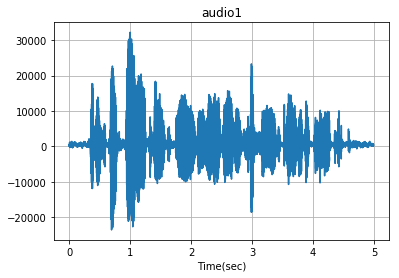

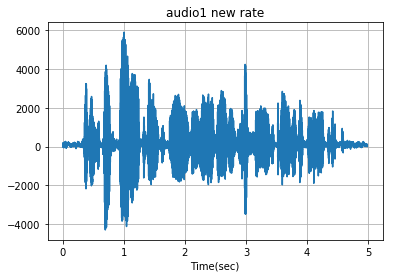

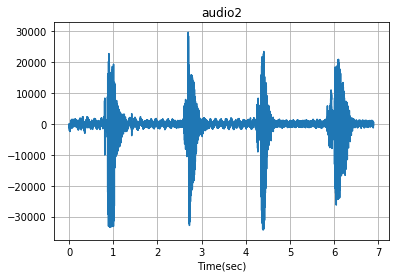

In [143]:
plt.title("audio1")
x1 = np.linspace(0, duration1, total_samples1)
plt.plot(x1, data1)
plt.xlabel('Time(sec)')
plt.grid()
plt.show()

plt.title("audio1 new rate")
x1_new = np.linspace(0, duration1, total_samples1_new)
plt.plot(x1_new, data1_new_rate)
plt.xlabel('Time(sec)')
plt.grid()
plt.show()

plt.title("audio2")
x2 = np.linspace(0, duration2, total_samples2)
plt.plot(x2, data2)
plt.xlabel('Time(sec)')
plt.grid()
plt.show()

In [139]:
np.abs(ft1).max()

21030264.0

### Fourier transform

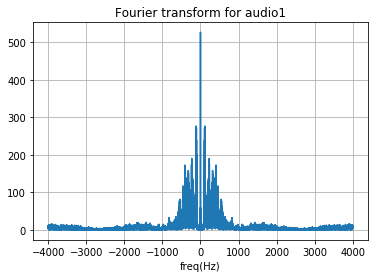

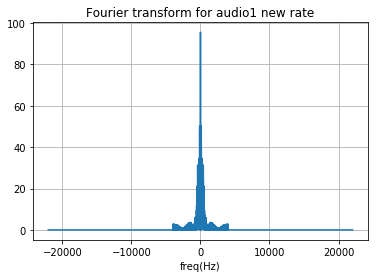

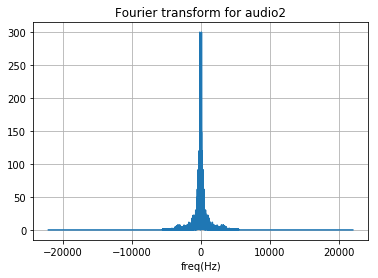

In [163]:
ft1 = fft(data1)
y_ft1 = 1/total_samples1 * np.abs(fftshift(ft1))
x_ft1 = fftfreq(total_samples1, sample_spacing1)
x_ft1 = fftshift(x_ft1)

y_ft1_new = 1/total_samples1_new * np.abs(fftshift(ft1_new))
x_ft1_new = fftfreq(total_samples1_new, sample_spacing1_new)
x_ft1_new = fftshift(x_ft1_new)

ft2 = fft(data2)
y_ft2 = 1/total_samples2 * np.abs(fftshift(ft2))
x_ft2 = fftfreq(total_samples2, sample_spacing2)
x_ft2 = fftshift(x_ft2)

plt.title("Fourier transform for audio1")
plt.plot(x_ft1, y_ft1)
plt.xlabel('freq(Hz)')
# plt.xlim(-6000,6000)
plt.grid()
plt.show()

plt.title("Fourier transform for audio1 new rate")
plt.plot(x_ft1_new, y_ft1_new)
plt.xlabel('freq(Hz)')
# plt.xlim(-6000,6000)
plt.grid()
plt.show()

plt.title("Fourier transform for audio2")
plt.plot(x_ft2, y_ft2)
plt.xlabel('freq(Hz)')
# plt.xlim(-6000,6000)
plt.grid()
plt.show()

In [83]:
data1_new_rate.dtype

dtype('float64')

## Hiding "audio1" in "audio2"
---

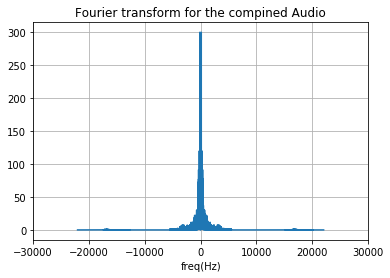

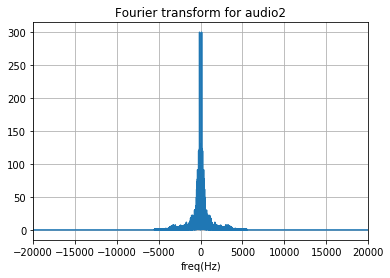

In [42]:

omega = 2.4
attenuationFactor = 0.01

data3 = np.array(data2)

for i in range(data1.size):
    data3[i] =data2[i]+ attenuationFactor* data1[i] * np.cos(i*omega)


    
ft3 = fft(data3)
y_ft3 = 1/total_samples2 * np.abs(fftshift(ft3))
x_ft3 = fftfreq(total_samples2, sample_spacing2)
x_ft3 = fftshift(x_ft3)

plt.title("Fourier transform for the compined Audio")
plt.plot(x_ft3, y_ft3)
plt.xlabel('freq(Hz)')
plt.xlim(-30000,30000)
plt.grid()
plt.show()

plt.title("Fourier transform for audio2")
plt.plot(x_ft2, y_ft2)
plt.xlabel('freq(Hz)')
plt.xlim(-20000, 20000)
plt.grid()
plt.show()

---

In [43]:
ipd.Audio(data3, rate=rate2) # Audio player


## Restore audio

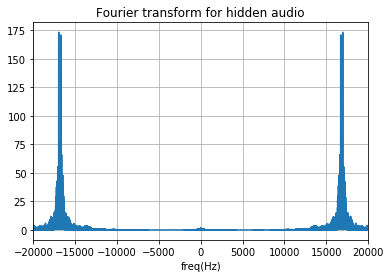

In [44]:
hiddenAudio = data3

for i in range(data3.size):
    hiddenAudio[i] = hiddenAudio[i]*np.cos(i*omega)
    
    
hiddenAudioFt = fft(hiddenAudio)
y_hiddenAudioFt = 1/total_samples2 * np.abs(fftshift(hiddenAudioFt))
x_hiddenAudioFt = fftfreq(total_samples2, sample_spacing2)
x_hiddenAudioFt = fftshift(x_hiddenAudioFt)


plt.title("Fourier transform for hidden audio")
plt.plot(x_hiddenAudioFt, y_hiddenAudioFt)
plt.xlabel('freq(Hz)')
plt.xlim(-20000, 20000)
plt.grid()
plt.show()



## apply filter and amplify signal

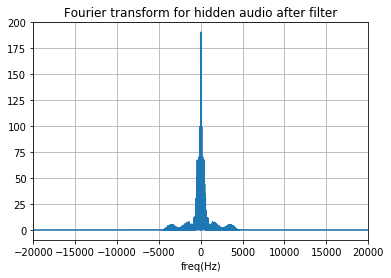

In [45]:
hiddenAudioAfterFilter = filterHighFreq(hiddenAudio/attenuationFactor)
hiddenAudioAfterFilterFt= fft(hiddenAudioAfterFilter)

y_hiddenAudioAfterFilterFt = 1/total_samples2 * np.abs(fftshift(hiddenAudioAfterFilterFt))
x_hiddenAudioAfterFilterFt = fftfreq(total_samples2, sample_spacing2)
x_hiddenAudioAfterFilterFt = fftshift(x_hiddenAudioAfterFilterFt)


plt.title("Fourier transform for hidden audio after filter and amplification")
plt.plot(x_hiddenAudioAfterFilterFt, y_hiddenAudioAfterFilterFt)
plt.xlabel('freq(Hz)')
plt.xlim(-20000, 20000)
plt.grid()
plt.show()

hiddenAudioAfterFilter = np.fft.ifft(hiddenAudioAfterFilterFt).real

In [46]:

ipd.Audio(hiddenAudioAfterFilter, rate=rate2) 